In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import itertools

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_trial_merge = pd.merge(clinical_trial_df, mouse_drug_df, on="Mouse ID")

# Display the data table for preview
clinical_trial_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_clinical_trial = clinical_trial_merge.groupby(["Drug", "Timepoint"])

drug_list = grouped_clinical_trial["Drug"].first()
timepoint_list = grouped_clinical_trial["Timepoint"].first()

avg_tumor_vol = grouped_clinical_trial["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
grouped_clinical_trial_df = pd.DataFrame({"Tumor Volume (mm3)": avg_tumor_vol}).reset_index()

# Preview DataFrame
grouped_clinical_trial_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grouped_tumor_trial = grouped_clinical_trial["Tumor Volume (mm3)"]

tumor_sem = grouped_tumor_trial.sem() 

# Convert to DataFrame
tumor_sem_df = pd.DataFrame({"Drug_":drug_list, "Timepoint_": timepoint_list, "Tumor Volume SEM": tumor_sem.values}).reset_index(drop = True)

# Preview DataFrame
tumor_sem_df


,Drug_,Timepoint_,Tumor Volume SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames

drug_tumor_table = pd.pivot_table(grouped_clinical_trial_df, values='Tumor Volume (mm3)', index='Timepoint', columns=['Drug'])


# Preview that Reformatting worked
drug_tumor_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


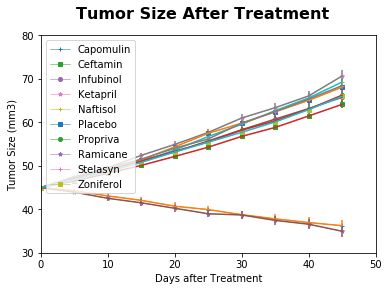

In [5]:
# Generate the Plot (with Error Bars)
x_list = grouped_clinical_trial_df["Timepoint"]
x_list = grouped_clinical_trial_df["Timepoint"].apply(lambda x : pd.to_numeric(x))

x_axis = [] 
[x_axis.append(x) for x in x_list if x not in x_axis]

x_values = np.array(x_axis)

marker = itertools.cycle(('+', 's', 'o', '*'))

fig, ax = plt.subplots()

fig.suptitle("Tumor Size After Treatment", fontsize=16, fontweight="bold")

ax.set_xlim(0, 50)
ax.set_ylim(30, 80)
ax.set_xlabel("Days after Treatment")
ax.set_ylabel("Tumor Size (mm3)")


drugs_list = list(drug_tumor_table.columns)
legend_list = []

for drug_name in drugs_list:

    first_drug_values = np.array(drug_tumor_table["%s" %drug_name])
    first_drug_values = drug_tumor_table["%s" %drug_name].apply(lambda x : pd.to_numeric(x))

    error = tumor_sem_df.groupby(["Drug_"]).get_group("%s" %drug_name)["Tumor Volume SEM"].tolist()
    
    ax.plot(x_values, first_drug_values, linewidth=0.5, marker=next(marker), markersize=4)
    ax.errorbar(x_values, first_drug_values, yerr = error)
    legend_list.append("%s" %drug_name)
    ax.legend(legend_list, loc = "upper left")
            
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_clinical_trial_m = clinical_trial_merge.groupby(["Drug", "Timepoint"])

drug_list = grouped_clinical_trial_m["Drug"].first()
timepoint_list = grouped_clinical_trial_m["Timepoint"].first()

avg_met_site = grouped_clinical_trial_m["Metastatic Sites"].mean()

# Convert to DataFrame
grouped_clinical_trial_m_df = pd.DataFrame({"Metastatic Sites": avg_met_site}).reset_index()

# Preview DataFrame
grouped_clinical_trial_m_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
grouped_met_trial = grouped_clinical_trial_m["Metastatic Sites"]

met_sem = grouped_met_trial.sem() 

# Convert to DataFrame
met_sem_df = pd.DataFrame({"Drug_":drug_list, "Timepoint_": timepoint_list, "Metastatic Sites SEM": met_sem.values}).reset_index(drop = True)

# Preview DataFrame
met_sem_df

,Drug_,Timepoint_,Metastatic Sites SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [8]:
# Minor Data Munging to Re-Format the Data Frames
drug_met_table = pd.pivot_table(grouped_clinical_trial_m_df, values='Metastatic Sites', index='Timepoint', columns=['Drug'])


# Preview that Reformatting worked
drug_met_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


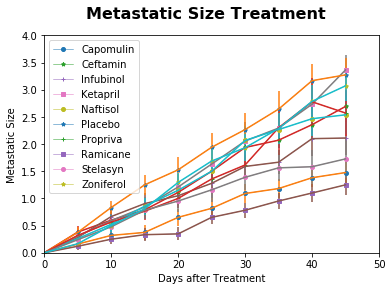

In [9]:
# Generate the Plot (with Error Bars)
#same x_values as previous plot

fig, ax = plt.subplots()

fig.suptitle("Metastatic Size Treatment", fontsize=16, fontweight="bold")

ax.set_xlim(0, 50)
ax.set_ylim(0, 4)
ax.set_xlabel("Days after Treatment")
ax.set_ylabel("Metastatic Size")

legend_list_m = []

for drug_name in drugs_list:

    first_drug_values = np.array(drug_met_table["%s" %drug_name])
    first_drug_values = drug_met_table["%s" %drug_name].apply(lambda x : pd.to_numeric(x))

    error = met_sem_df.groupby(["Drug_"]).get_group("%s" %drug_name)["Metastatic Sites SEM"].tolist()
    
    ax.plot(x_values, first_drug_values, linewidth=0.5, marker=next(marker), markersize=4)
    ax.errorbar(x_values, first_drug_values, yerr = error)
    legend_list_m.append("%s" %drug_name)
    ax.legend(legend_list_m, loc = "upper left")
            
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_clinical_trial_c = clinical_trial_merge.groupby(["Drug", "Timepoint"])

mouse_count = grouped_clinical_trial_c["Mouse ID"].count()

# Convert to DataFrame
grouped_clinical_trial_c_df = pd.DataFrame({"Number of Mice": mouse_count}).reset_index()

# Preview DataFrame
grouped_clinical_trial_c_df

,Drug,Timepoint,Number of Mice
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_table = pd.pivot_table(grouped_clinical_trial_c_df, values='Number of Mice', index='Timepoint', columns=['Drug'])


# Preview that Reformatting worked
mouse_count_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


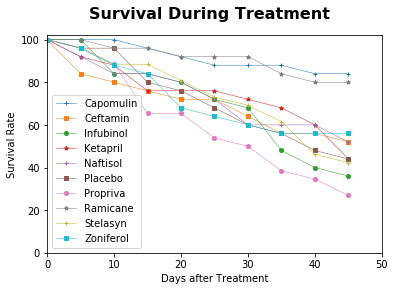

In [12]:
# Generate the Plot (Accounting for percentages)
#same x_values as previous plot

fig, ax = plt.subplots()

fig.suptitle("Survival During Treatment", fontsize=16, fontweight="bold")

ax.set_xlim(0, 50)
ax.set_ylim(0, 102)
ax.set_xlabel("Days after Treatment")
ax.set_ylabel("Survival Rate")

legend_list_c = []

for drug_name in drugs_list:
    
    initial_value = mouse_count_table["%s" %drug_name][0]
    first_percent_values = np.array(mouse_count_table["%s" %drug_name])
    first_percent_values = mouse_count_table["%s" %drug_name].apply(lambda x : pd.to_numeric(x))
    
    percent_values = (first_percent_values / initial_value)*100
    
    ax.plot(x_values, percent_values, linewidth=0.5, marker=next(marker), markersize=4)
    legend_list_c.append("%s" %drug_name)
    ax.legend(legend_list_c, loc = "lower left")
            
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

drug_names = grouped_clinical_trial_df["Drug"].unique()
tumor_change = []

for name in drug_names:
    percent_change = ((drug_tumor_table["%s" %name].iloc[-1] - drug_tumor_table["%s" %name].iloc[0])/drug_tumor_table["%s" %name].iloc[0])*100
    tumor_change.append(percent_change) 


# Display the data to confirm
tumor_change_df = pd.DataFrame({"Drug":drug_names, "Tumor Growth":tumor_change})

tumor_change_df

,Drug,Tumor Growth
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)